In [6]:
#import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 


In [4]:
df = pd.read_csv(r"C:\Users\Jaishree\Documents\python\datasets\Month_Value_1.csv")
df["Period"] = pd.to_datetime(df['Period'], format='%d.%m.%Y')
df = df.set_index("Period")
df.index.freq = 'MS' # takes first day of every month
df.dropna(inplace = True)
df.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-02-01,1.580759e+07,11636.0,1358.507000,30024676.0
2015-03-01,2.204715e+07,15922.0,1384.697024,30024676.0
2015-04-01,1.881458e+07,15227.0,1235.606705,30024676.0
2015-05-01,1.402148e+07,8620.0,1626.621765,30024676.0
2015-06-01,1.678393e+07,13160.0,1275.374508,30024676.0
2015-07-01,1.916189e+07,17254.0,1110.576805,30024676.0
2015-08-01,1.520498e+07,8642.0,1759.428870,30024676.0
2015-09-01,2.060394e+07,16144.0,1276.259909,30024676.0


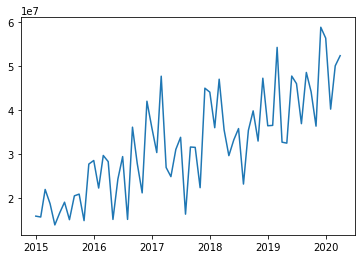

In [3]:
#look at revenue behavior over time
plt.plot(df.index,df["Revenue"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Revenue')
plt.show()

#upward trend

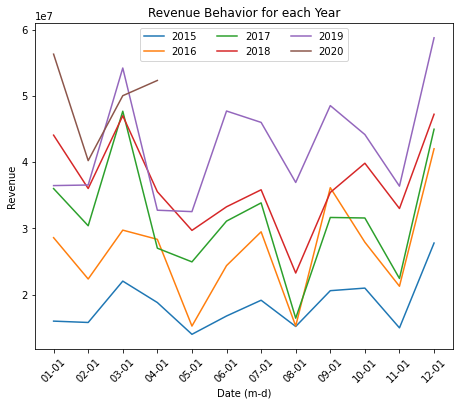

In [4]:
#compare Reveneue behavior for each year
fig, ax = plt.subplots(figsize=(7.5, 6))

#Plot revenue cycle for each year
for yr in np.unique(df.index.year):
    dfyear = df.loc[str(yr)]
    ax.plot(dfyear.index.strftime('%m-%d'),
            dfyear['Revenue'])
    
#Rotate x axis labels
plt.setp(ax.get_xticklabels(), rotation=45)

# Set title and labels for axes
ax.set(xlabel="Date (m-d)",
       ylabel="Revenue",
       title="Revenue Behavior for each Year")
ax.legend(np.unique(df.index.year),frameon=True, loc='upper center', ncol=3)
plt.show()

#Some seasonality present 
# - constant dips at 02-01,08-01, 11-01

In [7]:
dftest = adfuller(df.Revenue)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
#Not Stationary - p-value 0.930

Test Statistic                 -0.269149
p-value                         0.929762
#Lags Used                     11.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


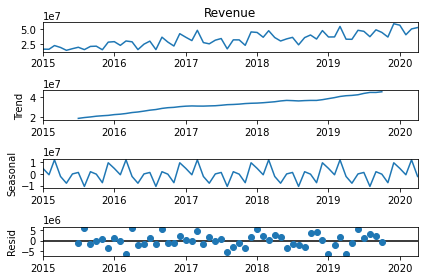

In [33]:
#shows breakdown of data behavior, trend, seasonality, residuals
result = seasonal_decompose(df["Revenue"], model='additive', freq = 12)
fig = result.plot()
plt.show()

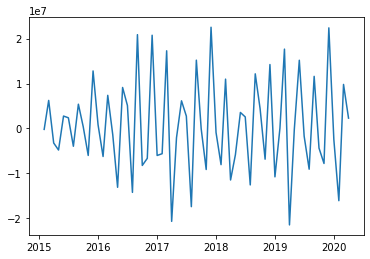

In [29]:
#try differencing by 1
rev_diff = df.Revenue.diff(1).dropna()
rev_diff
plt.plot(rev_diff)
plt.show()

In [30]:
dftest = adfuller(rev_diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
#p-value - <0.01

Test Statistic                 -5.604330
p-value                         0.000001
#Lags Used                     10.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


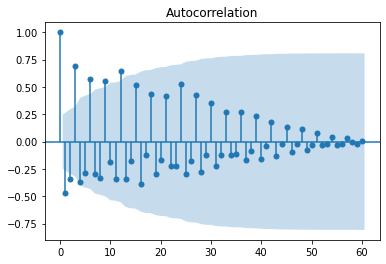

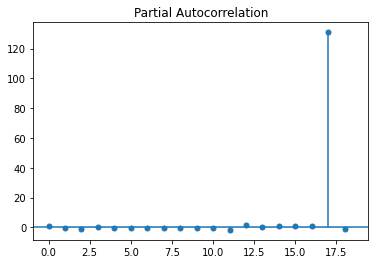

In [31]:
plot_acf(rev_diff, lags = 60)
plot_pacf(rev_diff)
plt.show()
